# Exploratory Data Analysis (EDA) on Heart Disease Dataset

This notebook provides a detailed exploratory data analysis (EDA) on a heart disease dataset. We will explore relationships among features and the target variable: **disease condition**.

**Dataset columns:**
- age, sex, chest pain type, resting blood pressure, serum cholestoral(mg/dl)
- fasting blood sugar > 120 mg/dl, resting electrocardiographic results
- maximum heart rate achieved, exercise induced angina
- Induced depression(exercise vs rest), slope peak exercise
- colored vessels, thalassemia, disease condition

**Tools Used**: Pandas, Seaborn, Matplotlib, Plotly


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
# Load dataset
df = pd.read_csv("cleaned_data_heart.csv")

# Display first few rows
df.head()


,age,sex,chest pain type,resting blood pressure,serum cholestoral(mg/dl),fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,Induced depression(exercise vs rest),slope peak exercise,colored vessels,thalassemia,disease condition
0,69,male,typical angina,160,234,True,left ventricular hypertrophy,131,no,0.1,flat,1,normal,no disease
1,69,female,typical angina,140,239,False,normal,151,no,1.8,upsloping,2,normal,no disease
2,66,female,typical angina,150,226,False,normal,114,no,2.6,downsloping,0,normal,no disease
3,65,male,typical angina,138,282,True,left ventricular hypertrophy,174,no,1.4,flat,1,normal,disease
4,64,male,typical angina,110,211,False,left ventricular hypertrophy,144,yes,1.8,flat,0,normal,no disease


## 1. What is the distribution of the target variable (disease condition)?

Understanding the class balance of the target is crucial for classification tasks.


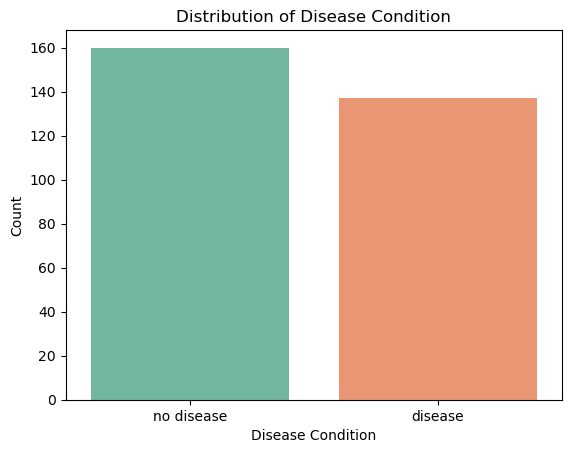

In [28]:
sns.countplot(data=df, x='disease condition', hue='disease condition', palette='Set2', legend=False)

plt.title('Distribution of Disease Condition')
plt.xlabel('Disease Condition')
plt.ylabel('Count')
plt.show()


## 2. How does age impact the presence of heart disease?

We investigate if age affects the likelihood of heart disease.


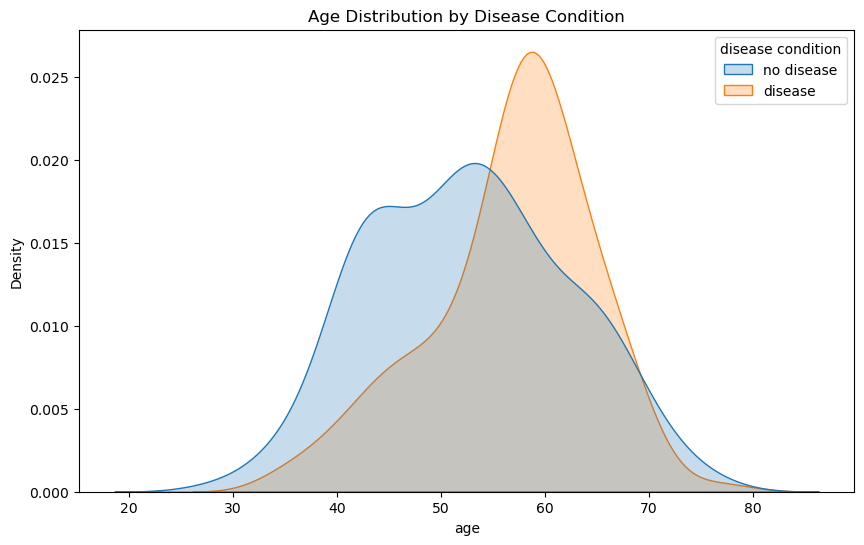

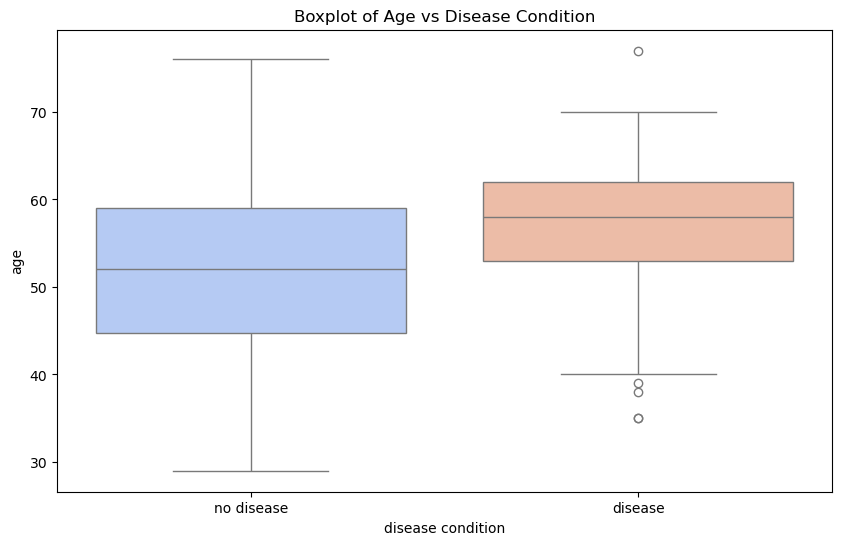

In [9]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="age", hue="disease condition", fill=True)
plt.title("Age Distribution by Disease Condition")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='disease condition', y='age', hue='disease condition', palette='coolwarm', dodge=False, legend=False)

plt.title("Boxplot of Age vs Disease Condition")
plt.show()


## 3. Is chest pain type associated with heart disease?

Certain types of chest pain may indicate higher risk.


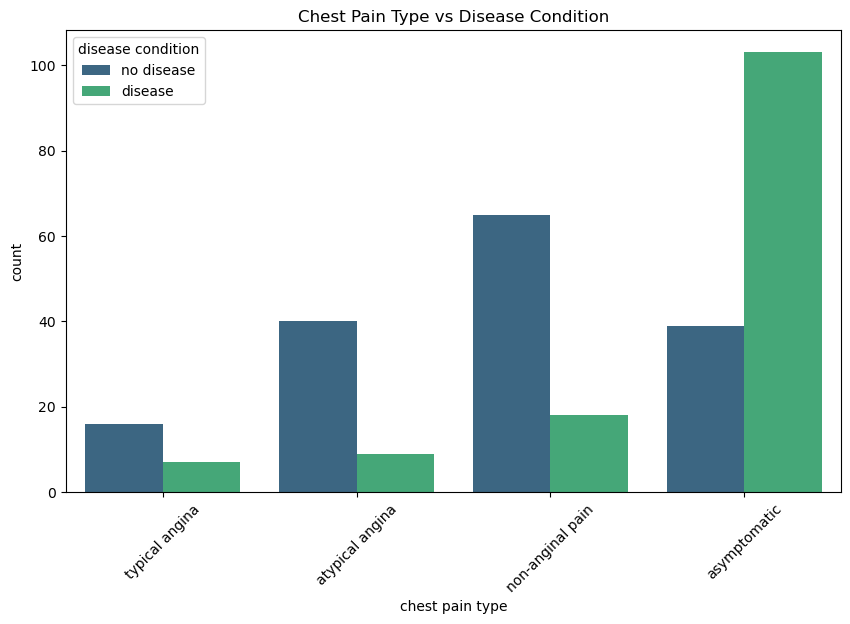

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="chest pain type", hue="disease condition", palette="viridis")
plt.title("Chest Pain Type vs Disease Condition")
plt.xticks(rotation=45)
plt.show()


## 4. How do maximum heart rate and exercise-induced angina relate to disease?

We compare exercise-related features.


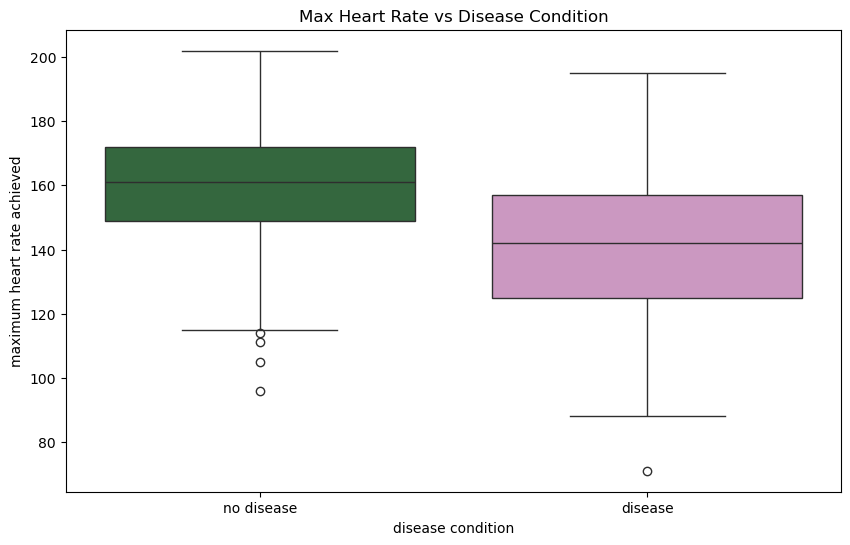

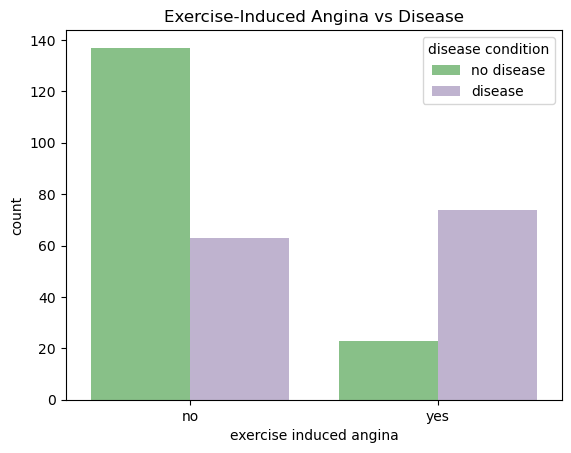

In [15]:
# Boxplot with explicit hue (to prevent future warning)
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df, 
    x='disease condition', 
    y='maximum heart rate achieved', 
    hue='disease condition', 
    palette='cubehelix', 
    dodge=False, 
    legend=False
)
plt.title("Max Heart Rate vs Disease Condition")
plt.show()

# Countplot is already using `hue`, so it's future-safe
sns.countplot(
    data=df, 
    x='exercise induced angina', 
    hue='disease condition', 
    palette='Accent'
)
plt.title("Exercise-Induced Angina vs Disease")
plt.show()


## 5. What is the relationship between cholesterol and disease?

High cholesterol levels might indicate risk factors.


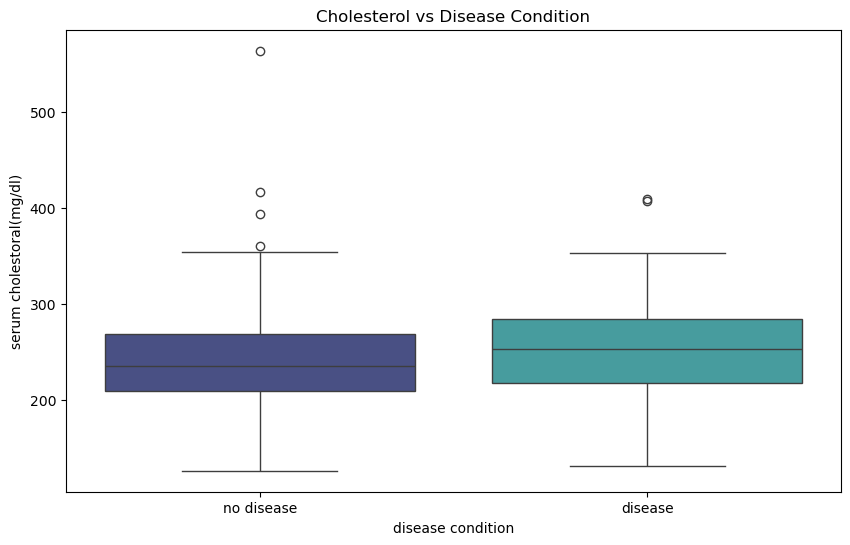

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x='disease condition',
    y='serum cholestoral(mg/dl)',
    hue='disease condition',
    palette='mako',
    dodge=False,
    legend=False
)
plt.title("Cholesterol vs Disease Condition")
plt.show()



## 6. How do sex, thalassemia, and colored vessels influence disease?

We examine demographic and genetic categorical features.


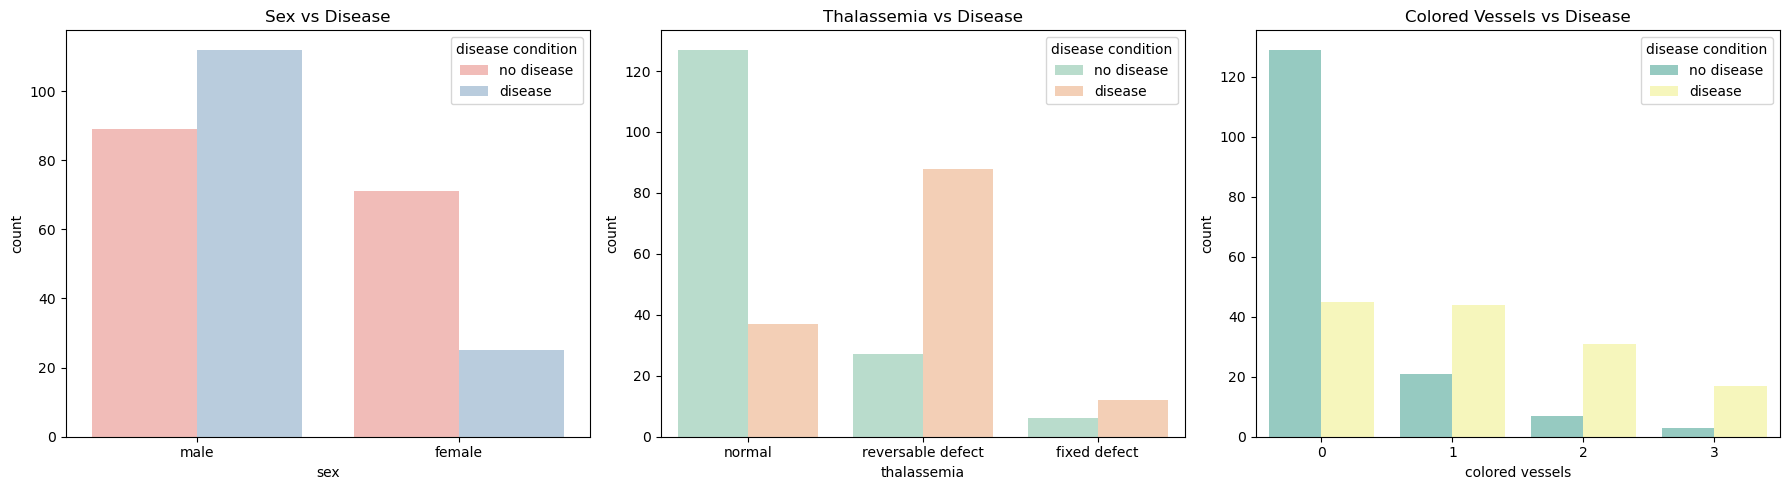

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(data=df, x='sex', hue='disease condition', ax=axs[0], palette='Pastel1')
axs[0].set_title("Sex vs Disease")

sns.countplot(data=df, x='thalassemia', hue='disease condition', ax=axs[1], palette='Pastel2')
axs[1].set_title("Thalassemia vs Disease")

sns.countplot(data=df, x='colored vessels', hue='disease condition', ax=axs[2], palette='Set3')
axs[2].set_title("Colored Vessels vs Disease")
plt.tight_layout()
plt.show()


### 7.Does resting blood pressure show different patterns between disease and no-disease groups?

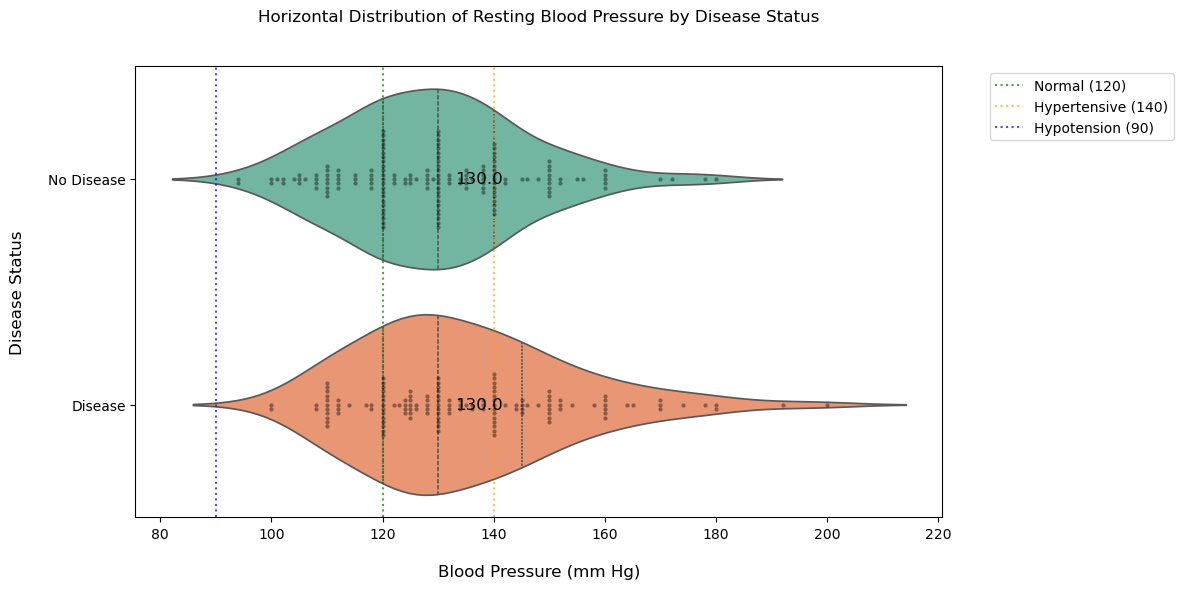

In [58]:
plt.figure(figsize=(12, 6))  # Wider aspect ratio for horizontal plot

# Create horizontal violin plot
ax = sns.violinplot(y='disease condition', x='resting blood pressure', 
                   data=df, orient='h', inner="quartile",
                   palette=["#66c2a5", "#fc8d62"])

# Add swarm plot horizontally
sns.swarmplot(y='disease condition', x='resting blood pressure',
             data=df, color="black", alpha=0.4, size=3, ax=ax)

# Add clinical reference lines (now vertical)
plt.axvline(x=120, color='green', linestyle=':', alpha=0.7, label='Normal (120)')
plt.axvline(x=140, color='orange', linestyle=':', alpha=0.7, label='Hypertensive (140)')
plt.axvline(x=90, color='blue', linestyle=':', alpha=0.7, label='Hypotension (90)')

# Add median annotations
medians = df.groupby('disease condition')['resting blood pressure'].median()
for i, median in enumerate(medians):
    ax.text(median+3, i, f'{median:.1f}', 
           verticalalignment='center',
           fontsize=12, color='black')

# Customize plot
plt.title('Horizontal Distribution of Resting Blood Pressure by Disease Status\n', pad=20)
plt.ylabel('Disease Status\n', fontsize=12)
plt.xlabel('\nBlood Pressure (mm Hg)', fontsize=12)
plt.yticks([0, 1], ['No Disease', 'Disease'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## 8.How does the combination of age and maximum heart rate predict disease status?

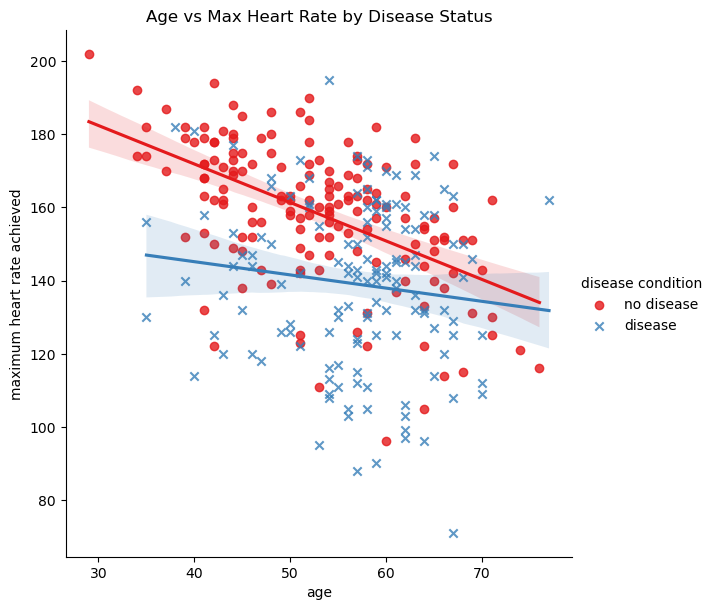

In [61]:
sns.lmplot(x='age', y='maximum heart rate achieved', hue='disease condition', 
           data=df, markers=['o','x'], palette='Set1', height=6)
plt.title('Age vs Max Heart Rate by Disease Status')
plt.show()

## 9.Are there differences in induced depression (ST depression) between disease groups?

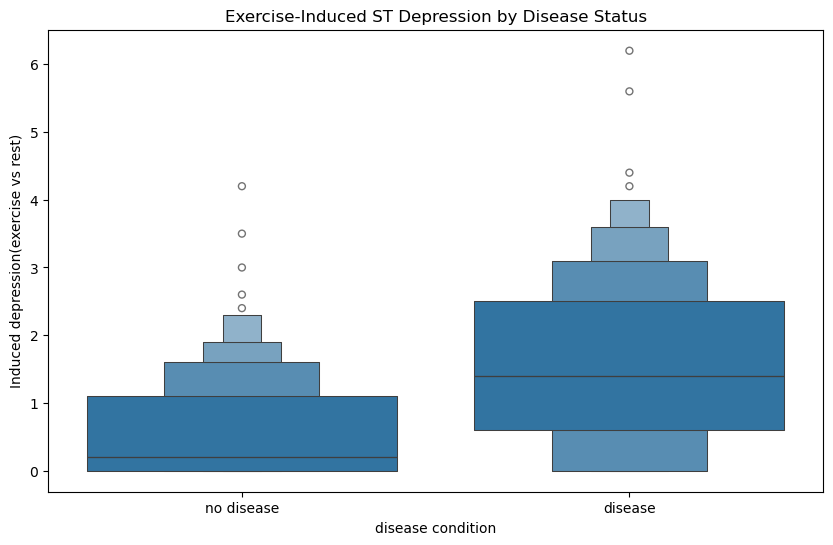

In [64]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='disease condition', y='Induced depression(exercise vs rest)', data=df)
plt.title('Exercise-Induced ST Depression by Disease Status')
plt.show()

## 10. How do the different types of resting ECG results relate to disease outcomes?

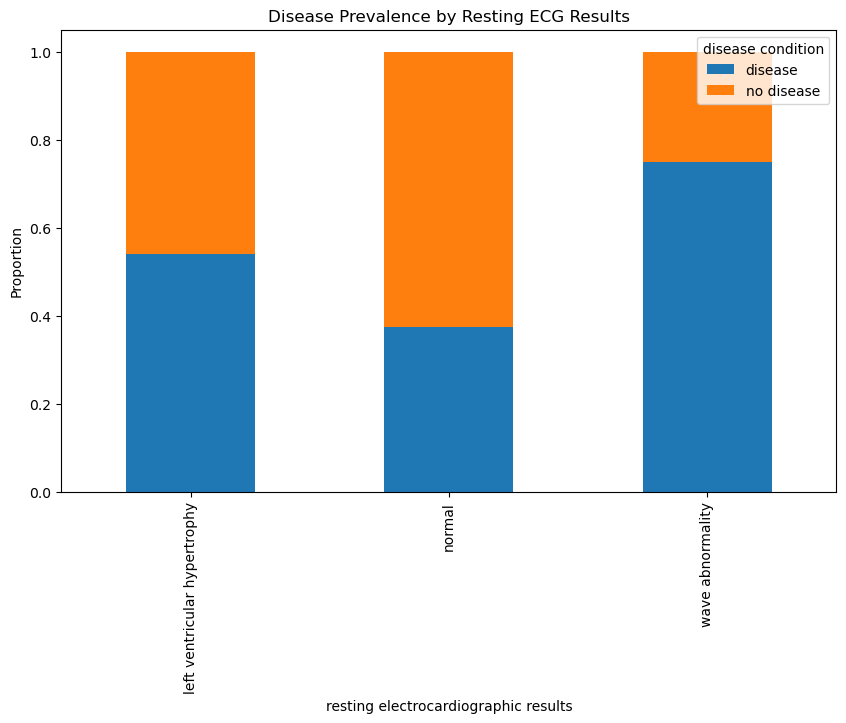

In [67]:
pd.crosstab(df['resting electrocardiographic results'], df['disease condition'], normalize='index').plot(
    kind='bar', stacked=True, figsize=(10,6))
plt.title('Disease Prevalence by Resting ECG Results')
plt.ylabel('Proportion')
plt.show()

## 11. Is there an interaction effect between cholesterol levels and slope peak exercise?

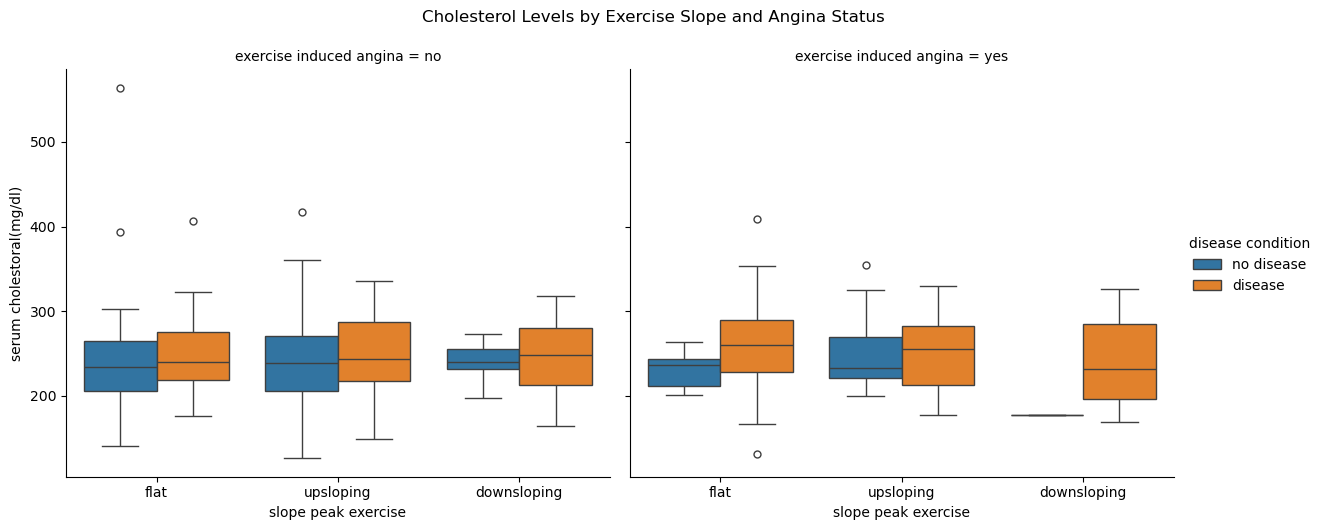

In [70]:
sns.catplot(x='slope peak exercise', y='serum cholestoral(mg/dl)', 
            hue='disease condition', col='exercise induced angina',
            kind='box', data=df, height=5, aspect=1.2)
plt.suptitle('Cholesterol Levels by Exercise Slope and Angina Status', y=1.05)
plt.show()